This program first opens the fits image and load the data into a variable. Afterwards, it extracts the backgorund data, find the noise, then subtract the background noise from the data using the sep.Background function suite. Afterwards. it uses the sep.extract function to find objects within the "clean" image data and highlighting those objects using matplotlib's Ellipse feature. Lastly,

In [17]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import astropy
from astropy.io import fits
import fitsio

In [23]:
%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul:
    data = hdul[0].data

data = data.astype(data.dtype.newbyteorder('='))
#data_changed = data.astype(data.dtype.newbyteorder('='))
bkg = sep.Background(data)
bkg_image = bkg.back()
bkg_rms = bkg.rms()
data_sub = data - bkg

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
for i in range(len(flux)):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877
object 10: flux = 0.104682 +/- 0.323559
object 11: flux = 0.044953 +/- 0.212041
object 12: flux = 0.014043 +/- 0.118538
object 13: flux = 0.010265 +/- 0.101357
object 14: flux = 0.011400 +/- 0.106811
object 15: flux = 0.025562 +/- 0.159908
object 16: flux = 0.016498 +/- 0.128478
object 17: flux = -0.008420 +/- 0.002875
object 18: flux = 0.006981 +/- 0.083599
object 19: flux = 0.014791 +/- 0.121653
object 20: flux = -0.002137 +/- 0.002863
object 21: flux = 0.057425 +/- 0.239652
object 22: flux = -0.006278 +/- 0.002863
object 23: flux = 0.034407 +/- 0.185514
object 24: flux = 0.031591 +/- 0.177761
obje

Mean is 0.361747.
Median is 0.030955.
Largest Outlier is 807.297284.
Outlier is 87.312490 standard deviations away from the mean.


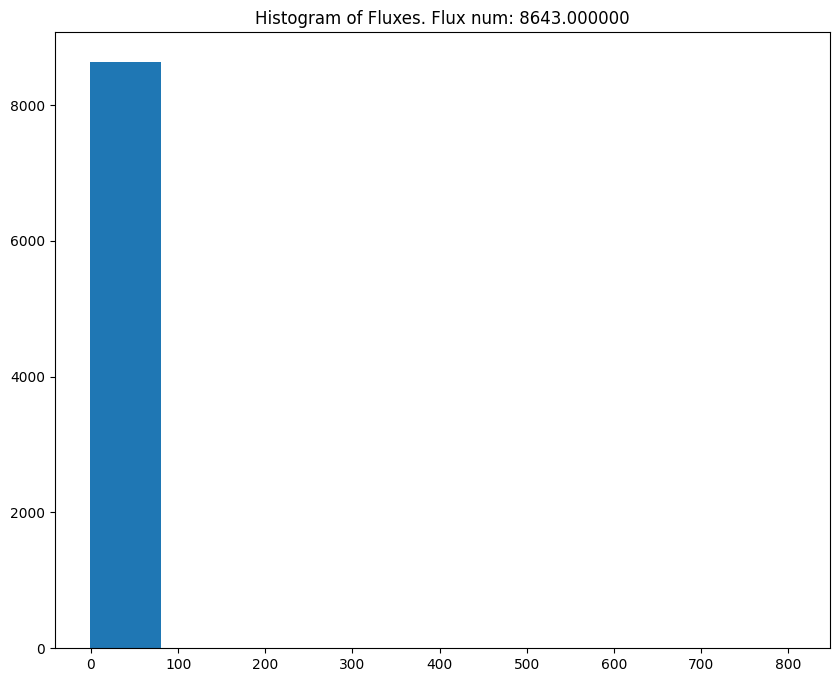

In [36]:
mean = np.mean(flux)
median = np.median(flux)

z_score = np.abs((flux - flux.mean()) / flux.std())
index = np.argmax(z_score)


print("Mean is {:f}.".format(mean))
print("Median is {:f}.".format(median))
print("Largest Outlier is {:f}.".format(flux[index]))
print("Outlier is {:f} standard deviations away from the mean.".format(z_score[index]))

plt.hist(flux) 
plt.title("Histogram of Fluxes. Flux num: {:f}".format(int(len(flux))))
plt.show()

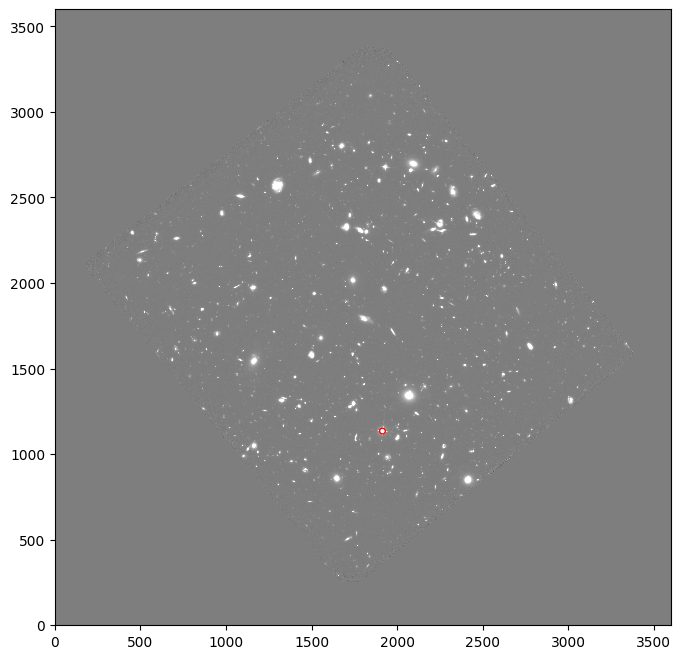

In [34]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

e = Ellipse(xy=(objects['x'][index], objects['y'][index]),
                width=6*objects['a'][index],
                height=6*objects['b'][index],
                angle=objects['theta'][index] * 180. / np.pi)
e.set_facecolor('none')
e.set_edgecolor('red')
ax.add_artist(e)
plt.show()